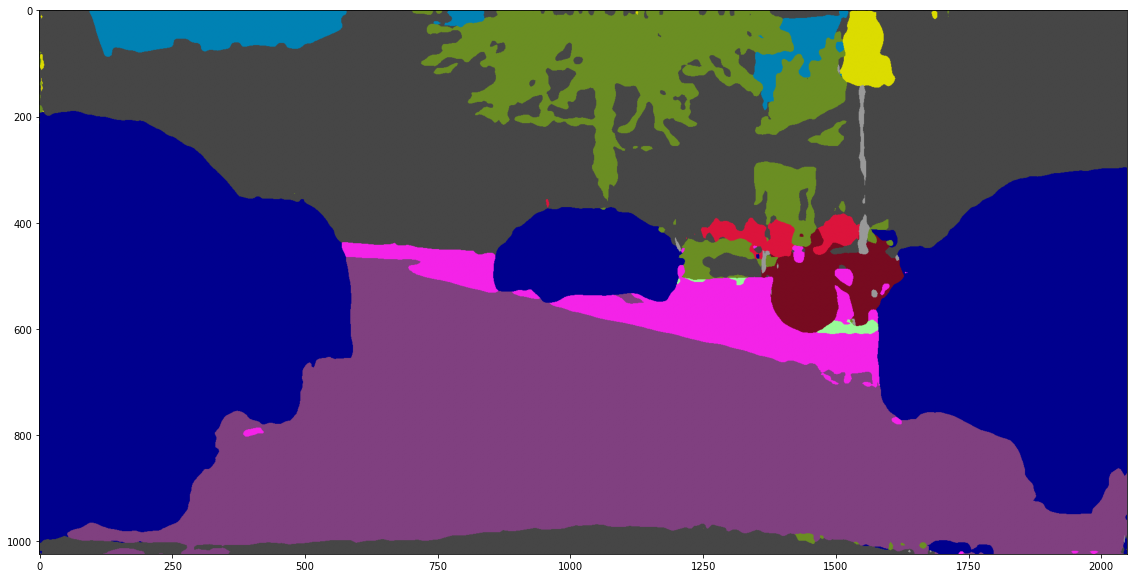

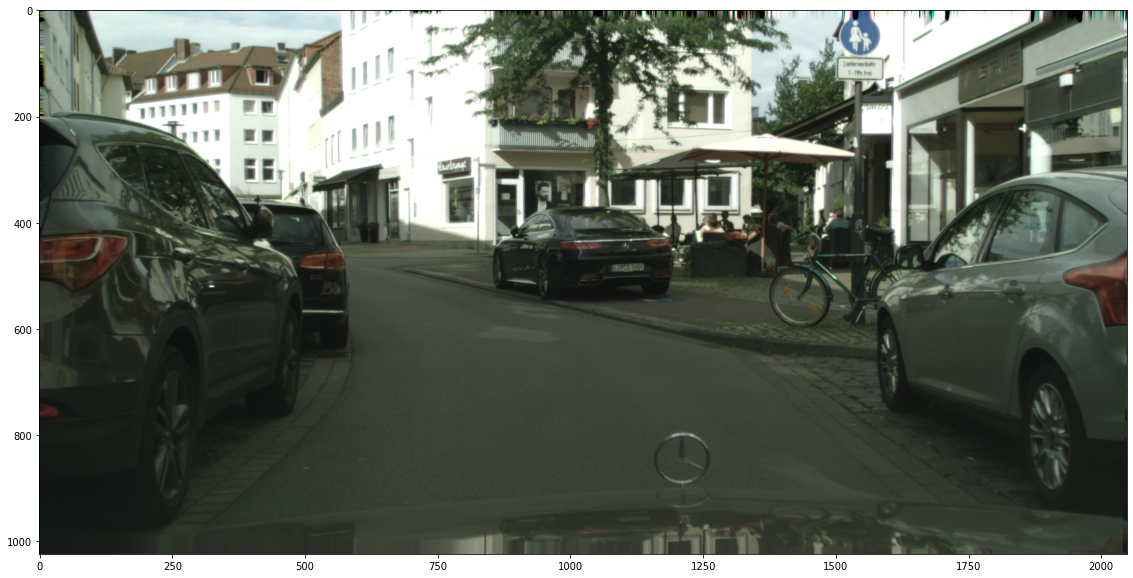

In [44]:
from PIL import Image
import numpy as np

import torch
import torchvision.transforms as tr

from modeling.deeplab import DeepLab
from dataloaders.utils import decode_segmap

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

checkpoint = torch.load("/home/ailab/Jinsu/imageSegmentation/pytorch-deeplab-xception/run/cityscapes/deeplab-resnet/model_best.pth.tar")
# print(checkpoint)
model = DeepLab(num_classes=19,
                backbone='resnet',
                output_stride=16,
                sync_bn=True,
                freeze_bn=False)

model.load_state_dict(checkpoint['state_dict'])
model.eval()
model.to(device)

def transform(image):
    return tr.Compose([
        # tr.Resize(513),
        # tr.CenterCrop(513),
        tr.ToTensor(),
        tr.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
    ])(image)

torch.set_grad_enabled(False)

img_path = "/home/ailab/datasets/cityscapes/leftImg8bit/test/bielefeld/bielefeld_000000_049313_leftImg8bit.png"
gt_path = ""
image = Image.open(img_path)
inputs = transform(image).to(device)
output = model(inputs.unsqueeze(0)).squeeze().cpu().numpy()
pred = np.argmax(output, axis=0)


import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
img = decode_segmap(pred, dataset="cityscapes", plot=True)
img_rgb = plt.imread(img_path)
plt.imshow(img_rgb)
plt.show()